In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import copy
from category_encoders import CountEncoder
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None # display all columns


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
school_grades_df = pd.read_csv('school_grades_dataset.csv')

## Binarna klasyfikacja vs 5-poziomowa klasyfikacja

In [599]:
s1 = school_grades_df.copy()
s1 = pd.cut(s1["G3"], bins=[-1, 9,20], labels=["fail","pass"])
s1 = s1.value_counts().rename_axis('G3').reset_index(name='counts')
s1

G3  counts
0  pass     549
1  fail     100

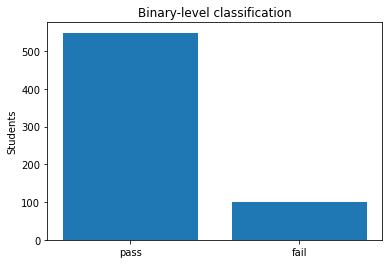

In [600]:
plt.bar(s1['G3'], s1['counts'])
plt.title("Binary-level classification")
plt.ylabel("Students")
plt.show()


In [601]:
s2 = school_grades_df.copy()
s2 = pd.cut(s2["G3"], bins=[-1, 9, 11, 13,15,np.inf], labels=[5,4,3,2,1])
s2 = s2.value_counts().rename_axis('G3').reset_index(name='counts')
s2

G3  counts
0  4     201
1  3     154
2  2     112
3  5     100
4  1      82

In [602]:
grades= {1:"1 excellent", 2:"2 good", 3:"3 satisfactory", 4:"4 sufficient", 5:"5 fail"}
s2 = s2.sort_values(by="G3",ascending=False)
s2.G3 = s2.G3.map(grades)


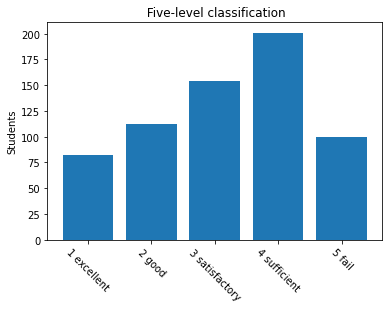

In [603]:
plt.bar(s2['G3'], s2['counts'])
plt.xticks(rotation=-45)
plt.title(" Five-level classification")
plt.ylabel("Students")
plt.show()

## Kodowanie zmiennych kategorycznych

In [3]:
count_encoder = CountEncoder(cols=['Mjob','Fjob','reason','guardian'],return_df=True)
school_grades_df = count_encoder.fit_transform(school_grades_df)
school_grades_df.head()

school sex  age address famsize Pstatus  Medu  Fedu  Mjob  Fjob  reason  \
0     GP   F   18       U     GT3       A     4     4   135    36     285   
1     GP   F   17       U     GT3       T     1     1   135   367     285   
2     GP   F   15       U     LE3       T     1     1   135   367      72   
3     GP   F   15       U     GT3       T     4     2    48   181     149   
4     GP   F   16       U     GT3       T     3     3   258   367     149   

   guardian  traveltime  studytime  failures schoolsup famsup paid activities  \
0       455           2          2         0       yes     no   no         no   
1       153           1          2         0        no    yes   no         no   
2       455           1          2         0       yes     no   no         no   
3       455           1          3         0        no    yes   no        yes   
4       153           1          2         0        no    yes   no         no   

  nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  \
0     yes    yes       no       no       4         3      4     1     1   
1      no    yes      yes       no       5         3      3     1     1   
2     yes    yes      yes       no       4         3      2     2     3   
3     yes    yes      yes      yes       3         2      2     1     1   
4     yes    yes       no       no       4         3      2     1     2   

   health  absences  G1  G2  G3  
0       3         4   0  11  11  
1       3         2   9  11  11  
2       3         6  12  13  12  
3       5         0  14  14  14  
4       5         0  11  13  13

In [4]:
dict2= {'yes':1, 'no':0}
school_grades_df.schoolsup=school_grades_df.schoolsup.map(dict2)
school_grades_df.famsup=school_grades_df.famsup.map(dict2)
school_grades_df.paid=school_grades_df.paid.map(dict2)
school_grades_df.activities=school_grades_df.activities.map(dict2)
school_grades_df.nursery=school_grades_df.nursery.map(dict2)
school_grades_df.higher=school_grades_df.higher.map(dict2)
school_grades_df.internet=school_grades_df.internet.map(dict2)
school_grades_df.romantic=school_grades_df.romantic.map(dict2)


In [5]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['school','sex','address','famsize','Pstatus'])
school_grades_df=encoder.fit_transform(school_grades_df)
school_grades_df

school_1  school_2  sex_1  sex_2  age  address_1  address_2  famsize_1  \
0           1         0      1      0   18          1          0          1   
1           1         0      1      0   17          1          0          1   
2           1         0      1      0   15          1          0          0   
3           1         0      1      0   15          1          0          1   
4           1         0      1      0   16          1          0          1   
..        ...       ...    ...    ...  ...        ...        ...        ...   
644         0         1      1      0   19          0          1          1   
645         0         1      1      0   18          1          0          0   
646         0         1      1      0   18          1          0          1   
647         0         1      0      1   17          1          0          0   
648         0         1      0      1   18          0          1          0   

     famsize_2  Pstatus_1  Pstatus_2  Medu  Fedu  Mjob  Fjob  reason  \
0            0          1          0     4     4   135    36     285   
1            0          0          1     1     1   135   367     285   
2            1          0          1     1     1   135   367      72   
3            0          0          1     4     2    48   181     149   
4            0          0          1     3     3   258   367     149   
..         ...        ...        ...   ...   ...   ...   ...     ...   
644          0          0          1     2     3   136   367     285   
645          1          0          1     3     1    72   181     285   
646          0          0          1     1     1   258   367     285   
647          1          0          1     3     1   136   181     285   
648          1          0          1     3     2   136   367     285   

     guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0         455           2          2         0          1       0     0   
1         153           1          2         0          0       1     0   
2         455           1          2         0          1       0     0   
3         455           1          3         0          0       1     0   
4         153           1          2         0          0       1     0   
..        ...         ...        ...       ...        ...     ...   ...   
644       455           1          3         1          0       0     0   
645       455           1          2         0          0       1     0   
646       455           2          2         0          0       0     0   
647       455           2          1         0          0       0     0   
648       455           3          1         0          0       0     0   

     activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0             0        1       1         0         0       4         3      4   
1             0        0       1         1         0       5         3      3   
2             0        1       1         1         0       4         3      2   
3             1        1       1         1         1       3         2      2   
4             0        1       1         0         0       4         3      2   
..          ...      ...     ...       ...       ...     ...       ...    ...   
644           1        0       1         1         0       5         4      2   
645           0        1       1         1         0       4         3      4   
646           1        1       1         0         0       1         1      1   
647           0        0       1         1         0       2         4      5   
648           0        0       1         1         0       4         4      1   

     Dalc  Walc  health  absences  G1  G2  G3  
0       1     1       3         4   0  11  11  
1       1     1       3         2   9  11  11  
2       2     3       3         6  12  13  12  
3       1     1       5         0  14  14  14  
4       1     2       5         0  11  13  13  
..    ...   ...     ...      

Skalowanie zmiennych - model random forest nie potrzebuje normalizacji i jest odporny na wartości odstające

In [6]:
school_grades_df_1 = school_grades_df.copy()
school_grades_df_1['G3'] = pd.cut(school_grades_df_1["G3"], bins=[-1, 9,20], labels=[0,1])
school_grades_df_1.head()

school_1  school_2  sex_1  sex_2  age  address_1  address_2  famsize_1  \
0         1         0      1      0   18          1          0          1   
1         1         0      1      0   17          1          0          1   
2         1         0      1      0   15          1          0          0   
3         1         0      1      0   15          1          0          1   
4         1         0      1      0   16          1          0          1   

   famsize_2  Pstatus_1  Pstatus_2  Medu  Fedu  Mjob  Fjob  reason  guardian  \
0          0          1          0     4     4   135    36     285       455   
1          0          0          1     1     1   135   367     285       153   
2          1          0          1     1     1   135   367      72       455   
3          0          0          1     4     2    48   181     149       455   
4          0          0          1     3     3   258   367     149       153   

   traveltime  studytime  failures  schoolsup  famsup  paid  activities  \
0           2          2         0          1       0     0           0   
1           1          2         0          0       1     0           0   
2           1          2         0          1       0     0           0   
3           1          3         0          0       1     0           1   
4           1          2         0          0       1     0           0   

   nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0        1       1         0         0       4         3      4     1     1   
1        0       1         1         0       5         3      3     1     1   
2        1       1         1         0       4         3      2     2     3   
3        1       1         1         1       3         2      2     1     1   
4        1       1         0         0       4         3      2     1     2   

   health  absences  G1  G2 G3  
0       3         4   0  11  1  
1       3         2   9  11  1  
2       3         6  12  13  1  
3       5         0  14  14  1  
4       5         0  11  13  1

In [7]:
school_grades_df_2 = school_grades_df.copy()
school_grades_df_2["G3"]=pd.cut(school_grades_df_2["G3"], bins=[-1, 9, 11, 13,15,np.inf], labels=[5,4,3,2,1])
# school_grades_df_2["G3"]=pd.cut(school_grades_df_2["G3"], bins=[-1, 9, 11, 13,15,np.inf], labels=[1,2,3,4,5])
school_grades_df_2.head()

school_1  school_2  sex_1  sex_2  age  address_1  address_2  famsize_1  \
0         1         0      1      0   18          1          0          1   
1         1         0      1      0   17          1          0          1   
2         1         0      1      0   15          1          0          0   
3         1         0      1      0   15          1          0          1   
4         1         0      1      0   16          1          0          1   

   famsize_2  Pstatus_1  Pstatus_2  Medu  Fedu  Mjob  Fjob  reason  guardian  \
0          0          1          0     4     4   135    36     285       455   
1          0          0          1     1     1   135   367     285       153   
2          1          0          1     1     1   135   367      72       455   
3          0          0          1     4     2    48   181     149       455   
4          0          0          1     3     3   258   367     149       153   

   traveltime  studytime  failures  schoolsup  famsup  paid  activities  \
0           2          2         0          1       0     0           0   
1           1          2         0          0       1     0           0   
2           1          2         0          1       0     0           0   
3           1          3         0          0       1     0           1   
4           1          2         0          0       1     0           0   

   nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0        1       1         0         0       4         3      4     1     1   
1        0       1         1         0       5         3      3     1     1   
2        1       1         1         0       4         3      2     2     3   
3        1       1         1         1       3         2      2     1     1   
4        1       1         0         0       4         3      2     1     2   

   health  absences  G1  G2 G3  
0       3         4   0  11  4  
1       3         2   9  11  4  
2       3         6  12  13  3  
3       5         0  14  14  2  
4       5         0  11  13  3

# Klasyfikacja binarna

### Model z G1 i G2

In [610]:
y = np.array(school_grades_df_1['G3'])
X = school_grades_df_1.drop(['G3'],axis=1)

In [611]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3, random_state=42)

In [612]:
print(X.shape,X_train.shape, X_val.shape, X_test.shape)

(649, 37) (454, 37) (136, 37) (59, 37)


In [613]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='uniform', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_val)
y_hat = dc.predict(X_val)

from sklearn.metrics import roc_auc_score

y=y_val
pred=y_hat
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [0 1 0 0 0 1 0 0 0 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.5231668915879442
accuracy   0.5588235294117647
recall     0.5726495726495726
precision  0.8701298701298701
f1         0.6907216494845361


In [614]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 1 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.768106162843005
accuracy   0.9044117647058824
recall     0.9572649572649573
precision  0.9333333333333333
f1         0.9451476793248945


In [615]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree1 = DecisionTreeClassifier()

tree1.fit(X_train,y_train)
y_hat = tree1.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

#plt.figure(figsize=(20,20))
#splits=tree.plot_tree(tree1, filled=True)

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 0 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.9082321187584345
accuracy   0.9558823529411765
recall     0.9743589743589743
precision  0.9743589743589743
f1         0.9743589743589743


In [616]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train,y_train)
y_hat = svm.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 1 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.5
accuracy   0.8602941176470589
recall     1.0
precision  0.8602941176470589
f1         0.924901185770751


In [617]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)
y_hat = nb.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 0 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.8911381016644174
accuracy   0.9264705882352942
recall     0.9401709401709402
precision  0.9734513274336283
f1         0.9565217391304347


In [618]:
X_train_val=pd.concat((X_train,X_val))
y_train_val=np.concatenate((y_train,y_val), axis=0)

# cross_val_score(lr, X_train_val, y_train_val, scoring='accuracy', cv = 10)
cross_val_score(tree1, X_train_val, y_train_val, scoring='accuracy', cv = 10)


array([0.84745763, 0.79661017, 0.96610169, 0.94915254, 0.86440678,
       0.91525424, 0.88135593, 0.91525424, 0.93220339, 0.96610169])

In [619]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_hat = model_rf.predict(X_val)

print("score     ",model_rf.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.8983050847457628
auc        0.8861898335582546
accuracy   0.9558823529411765
recall     0.9829059829059829
precision  0.9663865546218487
f1         0.9745762711864406


In [620]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.847457627118644
auc        0.9082321187584345
accuracy   0.9558823529411765
recall     0.9743589743589743
precision  0.9743589743589743
f1         0.9743589743589743


In [621]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01)
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.9322033898305084
auc        0.8115159694107061
accuracy   0.9411764705882353
recall     0.9914529914529915
precision  0.943089430894309
f1         0.9666666666666667


In [622]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
#                     nround = 100, # Ilość itereacji boosingowych
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

[18:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score      0.8813559322033898
auc        0.8904633378317589
accuracy   0.9632352941176471
recall     0.9914529914529915
precision  0.9666666666666667
f1         0.9789029535864978


### Model bez G1 i G2

In [623]:
y = np.array(school_grades_df_1['G3'])
X = school_grades_df_1.drop(['G3','G2','G1'],axis=1)
X

school_1  school_2  sex_1  sex_2  age  address_1  address_2  famsize_1  \
0           1         0      1      0   18          1          0          1   
1           1         0      1      0   17          1          0          1   
2           1         0      1      0   15          1          0          0   
3           1         0      1      0   15          1          0          1   
4           1         0      1      0   16          1          0          1   
..        ...       ...    ...    ...  ...        ...        ...        ...   
644         0         1      1      0   19          0          1          1   
645         0         1      1      0   18          1          0          0   
646         0         1      1      0   18          1          0          1   
647         0         1      0      1   17          1          0          0   
648         0         1      0      1   18          0          1          0   

     famsize_2  Pstatus_1  Pstatus_2  Medu  Fedu  Mjob  Fjob  reason  \
0            0          1          0     4     4   135    36     285   
1            0          0          1     1     1   135   367     285   
2            1          0          1     1     1   135   367      72   
3            0          0          1     4     2    48   181     149   
4            0          0          1     3     3   258   367     149   
..         ...        ...        ...   ...   ...   ...   ...     ...   
644          0          0          1     2     3   136   367     285   
645          1          0          1     3     1    72   181     285   
646          0          0          1     1     1   258   367     285   
647          1          0          1     3     1   136   181     285   
648          1          0          1     3     2   136   367     285   

     guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0         455           2          2         0          1       0     0   
1         153           1          2         0          0       1     0   
2         455           1          2         0          1       0     0   
3         455           1          3         0          0       1     0   
4         153           1          2         0          0       1     0   
..        ...         ...        ...       ...        ...     ...   ...   
644       455           1          3         1          0       0     0   
645       455           1          2         0          0       1     0   
646       455           2          2         0          0       0     0   
647       455           2          1         0          0       0     0   
648       455           3          1         0          0       0     0   

     activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0             0        1       1         0         0       4         3      4   
1             0        0       1         1         0       5         3      3   
2             0        1       1         1         0       4         3      2   
3             1        1       1         1         1       3         2      2   
4             0        1       1         0         0       4         3      2   
..          ...      ...     ...       ...       ...     ...       ...    ...   
644           1        0       1         1         0       5         4      2   
645           0        1       1         1         0       4         3      4   
646           1        1       1         0         0       1         1      1   
647           0        0       1         1         0       2         4      5   
648           0        0       1         1         0       4         4      1   

     Dalc  Walc  health  absences  
0       1     1       3         4  
1       1     1       3         2  
2       2     3       3         6  
3       1     1       5         0  
4       1     2       5         0  
..    ...   ...     ...       ...  
644     1     2       5         4  
645     1     1       1      

In [624]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3, random_state=42)

In [625]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 1 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.6273054430949168
accuracy   0.8897058823529411
recall     0.9914529914529915
precision  0.8923076923076924
f1         0.9392712550607288


In [626]:
from sklearn.tree import DecisionTreeClassifier,plot_tree 

tree1 = DecisionTreeClassifier()

tree1.fit(X_train,y_train)
y_hat = tree1.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

#plt.figure(figsize=(20,20))
#splits=tree.plot_tree(tree1, filled=True)

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 0 1 1 1 0 1 1 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.6023391812865497
accuracy   0.8088235294117647
recall     0.8888888888888888
precision  0.8888888888888888
f1         0.8888888888888888


In [627]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train,y_train)
y_hat = svm.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 1 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.5
accuracy   0.8602941176470589
recall     1.0
precision  0.8602941176470589
f1         0.924901185770751


In [628]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)
y_hat = nb.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

y:     [1 1 1 1 1 1 1 1 0 1]
y_hat: [1 1 1 1 1 1 1 1 0 1]
auc        0.751012145748988
accuracy   0.875
recall     0.9230769230769231
precision  0.9310344827586207
f1         0.927038626609442


In [629]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

y_hat = model_rf.predict(X_val)

print("score     ",model_rf.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.8983050847457628
auc        0.5526315789473684
accuracy   0.875
recall     1.0
precision  0.8731343283582089
f1         0.9322709163346613


In [630]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.8135593220338984
auc        0.7282950967161494
accuracy   0.9117647058823529
recall     0.9829059829059829
precision  0.92
f1         0.9504132231404959


In [631]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01)
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

score      0.8983050847457628
auc        0.5789473684210527
accuracy   0.8823529411764706
recall     1.0
precision  0.8796992481203008
f1         0.936


In [632]:
from xgboost import XGBClassifier # Inna paczka niż sklearn!
model=XGBClassifier(random_state=1,
                    learning_rate=0.01, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
#                     nround = 100, # Ilość itereacji boosingowych
                    max_depth=4 # Maksymalna głębokość drzewa 
                    )
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print("score     ",model.score(X_test,y_test))
print("auc       ",roc_auc_score(y_val,y_hat))
print("accuracy  ",accuracy_score(y_val,y_hat))
print("recall    ",recall_score(y_val,y_hat))
print("precision ",precision_score(y_val,y_hat))
print("f1        ",f1_score(y_val,y_hat))

[18:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score      0.864406779661017
auc        0.6713900134952766
accuracy   0.8897058823529411
recall     0.9743589743589743
precision  0.9047619047619048
f1         0.9382716049382716


Wnioski:
- Do klasyfikacji binarnej uwzględniającej G1 i G2 najlepszy okazał się model regresji logistycznej i model AdaBoost wynikami accuracy około 0.93

- Do klasyfikacji binarnej nie uwzględniającej G1 i G2 naj;epszy okazały się model AdaBoost i model GradientBoostingClassifier, które otrzymały wyniki accuracy bardzo podobne około 0.9

# Klasyfikacja 5-poziomowa

### Model z G1 i G2

In [24]:
y1 = np.array(school_grades_df_2['G3'])
X1 = school_grades_df_2.drop(['G3'],axis=1)

In [25]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_val, y1_val, test_size=0.3, random_state=42)

In [26]:
model_rf = RandomForestClassifier(n_estimators=500) # Ilość słabych estymatorów
                                  
model_rf.fit(X1_train, y1_train)
model_rf.score(X1_test,y1_test)

0.7796610169491526

In [33]:
y_hat=model_rf.predict(X1_val)
print('y:     ' + str(y_hat[0:15]) + '\ny_hat: ' + str(y1_val[0:15]))

print("score     ",model_rf.score(X1_test,y1_test))
print("accuracy  ",accuracy_score(y1_val,y_hat))

y:     [3 3 2 3 3 4 4 3 4 3 1 3 1 1 4]
y_hat: [2 3 3 3 3 4 3 3 5 3 1 3 1 1 4]
score      0.7796610169491526
accuracy   0.7794117647058824


In [12]:
X1_train_val=pd.concat((X1_train,X1_val))
y1_train_val=np.concatenate((y1_train,y1_val), axis=0)
cross_val_score(model_rf, X1_train_val, y1_train_val, scoring='accuracy', cv = 10)

array([0.72881356, 0.76271186, 0.72881356, 0.89830508, 0.72881356,
       0.74576271, 0.6440678 , 0.71186441, 0.76271186, 0.76271186])

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X1_train, y1_train)
nb.score(X1_test,y1_test)

0.5423728813559322

In [43]:
y_hat = nb.predict(X1_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y1_val[0:10]))

print("score     ",nb.score(X1_test,y1_test))
print("accuracy  ",accuracy_score(y1_val,y_hat))


y:     [1 1 3 1 3 2 3 1 5 1]
y_hat: [2 3 3 3 3 4 3 3 5 3]
score      0.5423728813559322
accuracy   0.5073529411764706


In [14]:
cross_val_score(nb, X1_train_val, y1_train_val, scoring='accuracy', cv = 10)

array([0.50847458, 0.49152542, 0.54237288, 0.47457627, 0.54237288,
       0.61016949, 0.45762712, 0.45762712, 0.50847458, 0.54237288])

### Model bez G1 i G2

In [35]:
y2 = np.array(school_grades_df_2['G3'])
X2 = school_grades_df_2.drop(['G3','G2','G1'],axis=1)

In [36]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_val, y2_val, test_size=0.3, random_state=42)

In [37]:
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X2_train, y2_train)
model_rf.score(X2_test,y2_test)


0.4406779661016949

In [38]:
y_hat=model_rf.predict(X2_val)
print('y:     ' + str(y_hat[0:15]) + '\ny_hat: ' + str(y1_val[0:15]))

print("score     ",model_rf.score(X2_test,y2_test))
print("accuracy  ",accuracy_score(y2_val,y_hat))

y:     [2 4 4 2 3 2 3 4 4 3 4 4 2 3 4]
y_hat: [2 3 3 3 3 4 3 3 5 3 1 3 1 1 4]
score      0.4406779661016949
accuracy   0.38235294117647056


In [18]:
X2_train_val=pd.concat((X2_train,X2_val))
y2_train_val=np.concatenate((y2_train,y2_val), axis=0)
cross_val_score(model_rf, X2_train_val, y2_train_val, scoring='accuracy', cv = 10)

array([0.3559322 , 0.42372881, 0.38983051, 0.30508475, 0.42372881,
       0.38983051, 0.38983051, 0.42372881, 0.38983051, 0.33898305])

In [45]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)
nb.score(X2_test,y2_test)

0.3559322033898305

In [46]:
y_hat = nb.predict(X2_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y2_val[0:10]))

print("score     ",nb.score(X2_test,y2_test))
print("accuracy  ",accuracy_score(y2_val,y_hat))

y:     [1 1 3 1 3 1 1 1 4 1]
y_hat: [2 3 3 3 3 4 3 3 5 3]
score      0.3559322033898305
accuracy   0.3161764705882353


In [20]:
cross_val_score(nb, X2_train_val, y2_train_val, scoring='accuracy', cv = 10)

array([0.25423729, 0.23728814, 0.28813559, 0.22033898, 0.3559322 ,
       0.30508475, 0.25423729, 0.28813559, 0.3220339 , 0.25423729])

Wnioski:
- Do klasyfikacji 5-poziomowej uwzględniającej G1 i G2 najlepszy okazał się model Random Forest z wynikiem accuracy około 0.75
- Do klasyfikacji 5-poziomowej nie uwzględniającej G1 i G2 model Random Forest jak i Naive Bayes otrzymywał wyniki accuracy bardzo podobne około 0.3